Install additional libraries from pip using requirements.txt

In [1]:
import sys
#!{sys.executable} -m pip install -r requirements.txt
print("requirements installed \n running program...")



requirements installed 
 running program...


In [108]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# List files available
print(os.listdir("../kaggle/all/"))

['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [4]:
# Training data
app_train = pd.read_csv('../kaggle/all/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('../kaggle/all/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Metric: ROC AUC
ie the true positive rate verus the false positive rate
Data is unbalanced with the majority of borrowers not defaulting

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

282686 Non-defaulting (0)
24825 Defaulting (1)


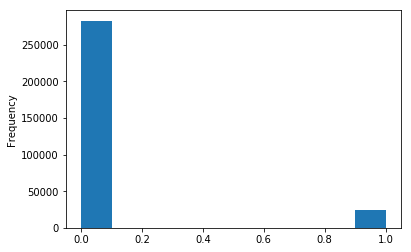

In [8]:
app_train['TARGET'].astype(int).plot.hist()

24825 loans have defaulted

In [9]:
app_train[app_train['TARGET'] == 1].head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Missing Data

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [134]:
missing_data = missing_values_table(app_train)
missing_data.head(30)

# default_average = app_train[app_train['TARGET'] == 1].mean()


Dataframe has 122 columns.
There are 69 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [133]:
app_train[['SK_ID_CURR', 'TARGET','AMT_GOODS_PRICE']][app_train['AMT_GOODS_PRICE'].isnull()].head()

,SK_ID_CURR,TARGET,AMT_GOODS_PRICE
724,100837,0,NaN
5937,106955,0,NaN
6425,107494,0,NaN
6703,107822,0,NaN
7647,108913,0,NaN


# Data Types

In [13]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0) # 3 Gender types? 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

XNA and XAP appear to be used as variants for NaN

In [15]:
app_train['CODE_GENDER'].value_counts() # clean up XNA to NaN

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
app_train[app_train['CODE_GENDER'] == "XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [17]:
app_test = app_test.replace('XNA',np.nan) # replace XNA with NaN
app_train = app_train.replace('XNA',np.nan)
app_test = app_test.replace('XAP',np.nan)# replace XAP with NaN
app_train = app_train.replace('XAP',np.nan)


In [18]:
app_train[app_train['CODE_GENDER'] == "XAP"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Encoding Categorical Variables into one-hot encoding

In [19]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
# one-hot encoding of categorical variables
app_train2 = pd.get_dummies(app_train)
app_test2 = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [21]:
# Columns are not the same between training and testing data
print("The difference between app_train and app_test is...")
for col in app_train2:
    if col not in app_test2:
        print(col)

The difference between app_train and app_test is...
TARGET
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


One-hot encoding has created three new columns that do not match any values in test. NB Target column was never included in Test data.

Test data must not contain any maternity leave as income type or unknown for family status

In [22]:
for col in app_test2:
    if "FAMILY" in col:
        print(col)

NAME_FAMILY_STATUS_Civil marriage
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Separated
NAME_FAMILY_STATUS_Single / not married
NAME_FAMILY_STATUS_Widow


In [23]:
for col in app_train2:
    if "FAMILY" in col:
        print(col)

NAME_FAMILY_STATUS_Civil marriage
NAME_FAMILY_STATUS_Married
NAME_FAMILY_STATUS_Separated
NAME_FAMILY_STATUS_Single / not married
NAME_FAMILY_STATUS_Unknown
NAME_FAMILY_STATUS_Widow


# Anomalies

Examining the data for any anomalous data entries

In [165]:
app_train.describe()
# for col in app_train2:
#     print("{}\n".format(app_train2[col].describe()))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# DAYS EMPLOYED

The maximum value of 365243 days can't be correct. 

In [25]:
print(365243/365) # maximum value for days employed would be employed for ~1000 years

1000.6657534246575


In [26]:
# app_train[app_train['DAYS_EMPLOYED'] > 360000].count() 
app_train2['DAYS_EMPLOYED'].value_counts() # Days employed description is How many days before the application the person started current employment,time only relative to the application
# value should be negative ie number of days before

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
           ...  
-12768         1
-10604         1
-10857         1
-8810          1
-14955         1
-11113         1
-11369         1
-13420         1
-10346         1
-10860         1
-12649         1
-10358         1
-12650         1
-10870         1
-12919         1
-14968         1
-13175         1
-11382         1
-10101         1
-12150         1
-10603         1
-12393         1
-9694          1
-11741         1
-13162         1
-11115         1
-11371         1
-11883        

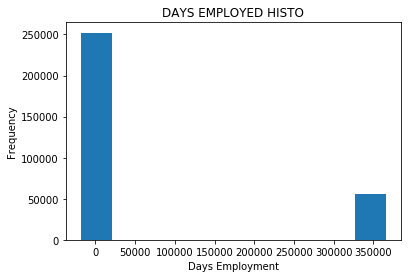

In [27]:
app_train2['DAYS_EMPLOYED'].plot.hist(title = 'DAYS EMPLOYED HISTO');
plt.xlabel('Days Employment');

In [28]:
positive_days_employed =  app_train[app_train['DAYS_EMPLOYED'] > 0]
positive_days_employed['NAME_INCOME_TYPE'].head()

# positive_days_employed['NAME_INCOME_TYPE'].value_counts()

8     Pensioner
11    Pensioner
23    Pensioner
38    Pensioner
43    Pensioner
Name: NAME_INCOME_TYPE, dtype: object

55374 entries have the same input of 365243. Looks like an error. Checking discussion boards. See...

"Thanks for asking the question as encoding of missing values hasn't been explained. Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values."

https://www.kaggle.com/c/home-credit-default-risk/discussion/57247

In [29]:
positive_days_employed =  app_train[app_train['DAYS_EMPLOYED'] > 0]
positive_days_employed['NAME_INCOME_TYPE'].value_counts()

# for col in app_train:
#     if "TYPE" in col:
#         print(col)

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

It looks like all of the people with DAYS_EMPLOYED greater than 0 are either pensioners or unemployed ie all are unemployed. 

Looks like these should really be NaN

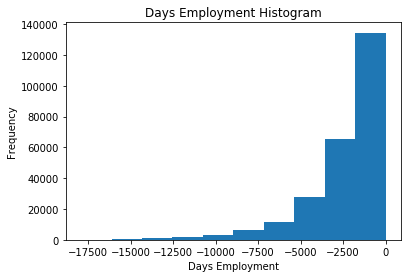

In [30]:
# Create an anomalous flag column
app_train2['DAYS_EMPLOYED_ANOM'] = app_train2["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train2['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train2['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [31]:
app_test2['DAYS_EMPLOYED_ANOM'] = app_test2["DAYS_EMPLOYED"] == 365243
app_test2["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test2["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))



There are 9274 anomalies in the test data out of 48744 entries


# Correlations

Looking at correlation between variables and TARGET. Using Pearson correlation coefficient.

    .00-.19 “very weak”
    .20-.39 “weak”
    .40-.59 “moderate”
    .60-.79 “strong”
    .80-1.0 “very strong”


In [32]:
# Find correlations with the target and sort
correlations = app_train2.corr()['TARGET'].sort_values(ascending=False)
correlations
# # Display correlations
# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
DAYS_REGISTRATION                                    0.041975
OWN_CAR_

# AGES

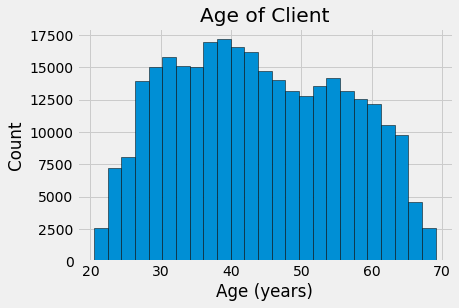

In [33]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train2['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

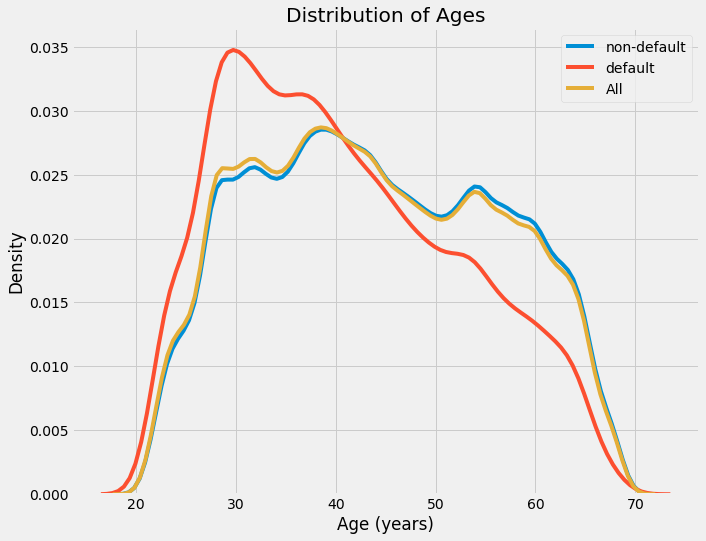

In [36]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'non-default')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'default')

# KDE plot of all loans by age
sns.kdeplot(app_train['DAYS_BIRTH'] / -365, label = 'All')


# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');



Looks like non-defaulting ages closely match the average but defaulting ages scew younger than 40 years old

Intuition is that Age and DAYS_EMPLOYED probably correlate. ie older people are likely to have worked for longer

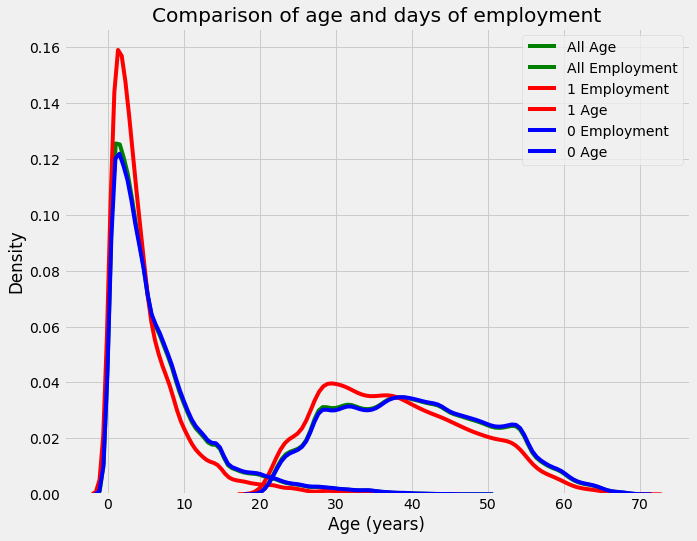

In [117]:
plt.figure(figsize = (10, 8))
day_df = app_train2[app_train2.DAYS_EMPLOYED.notnull()] # dropping NaN values to plot

# KDE plot of all ages and all days employment
sns.kdeplot(day_df['DAYS_BIRTH']/ -365, label = "All Age", color='g') 
sns.kdeplot(day_df['DAYS_EMPLOYED']/ -365, label = "All Employment", color='g') 


# KDE plot of defaulting loans by days of employment and birth
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 1), 'DAYS_EMPLOYED']/ -365, label = "1 Employment", color='r')
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 1), 'DAYS_BIRTH']/ -365, label = "1 Age", color='r') 



# KDE plot of non-defaulting loans by days of employment and birth
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 0), 'DAYS_EMPLOYED']/ -365, label = "0 Employment", color='b')
sns.kdeplot(day_df.loc[(day_df['TARGET'] == 0), 'DAYS_BIRTH']/ -365, label = "0 Age", color='b')   
                           

# # Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Comparison of age and days of employment');


0 employment and 0 age seems to track overall distribution - although that is to be expected as data is heavily unbalanced in favour of non-defaulting. Days employed looks like a Pareto distribution. 

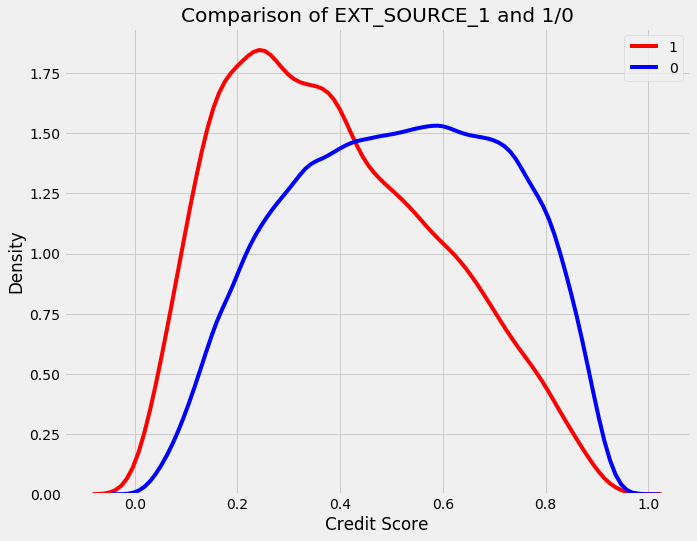

In [149]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_1.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_1'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_1'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_1 and 1/0');




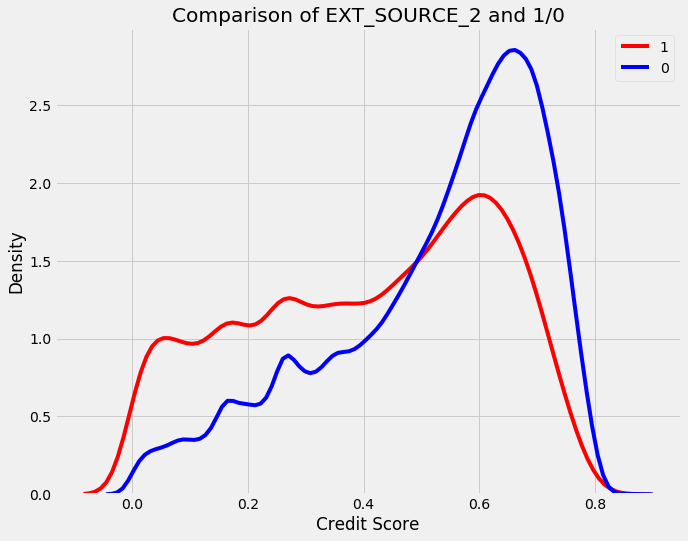

In [130]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_2.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_2'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_2'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_2 and 1/0');




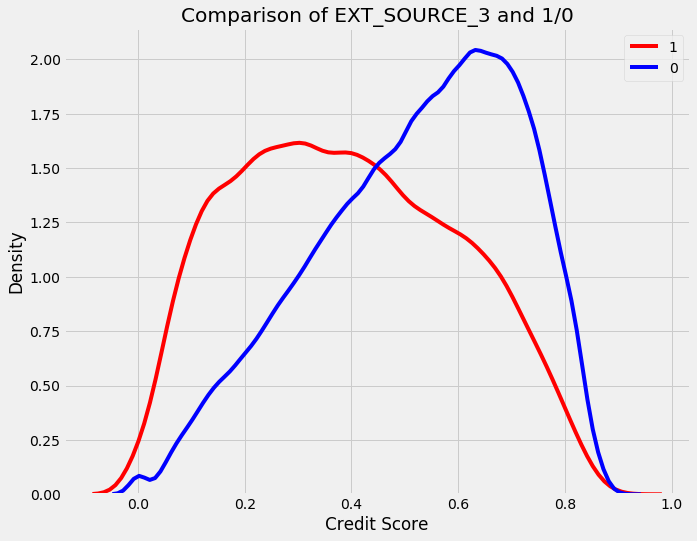

In [132]:
plt.figure(figsize = (10, 8))
ext_df = app_train2[app_train2.EXT_SOURCE_3.notnull()]

sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 1), 'EXT_SOURCE_3'], label = "1", color='r') 
sns.kdeplot(ext_df.loc[(ext_df['TARGET'] == 0), 'EXT_SOURCE_3'], label = "0", color='b') 


# # Labeling of plot
plt.xlabel('Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_3 and 1/0');



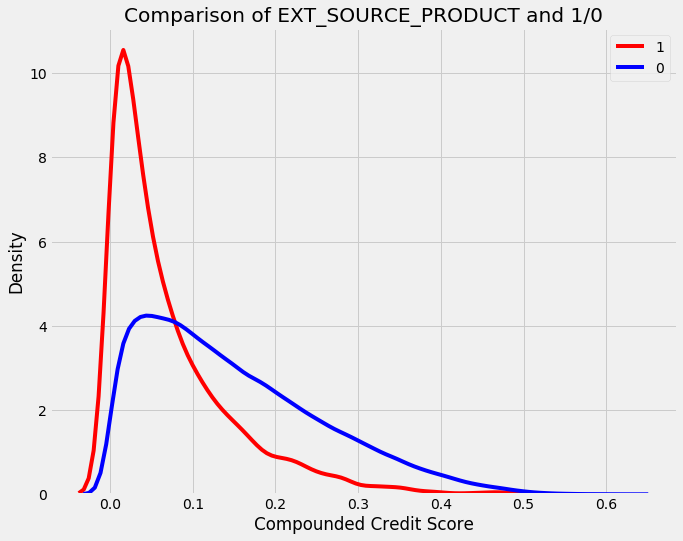

In [160]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_2_3_PRODUCT'] = app_train2.EXT_SOURCE_1 * app_train2.EXT_SOURCE_2 * app_train2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_2_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_2_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_2_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_2_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT and 1/0');



Just using EXT_SOURCE_1 and EXT_SOURCE_3

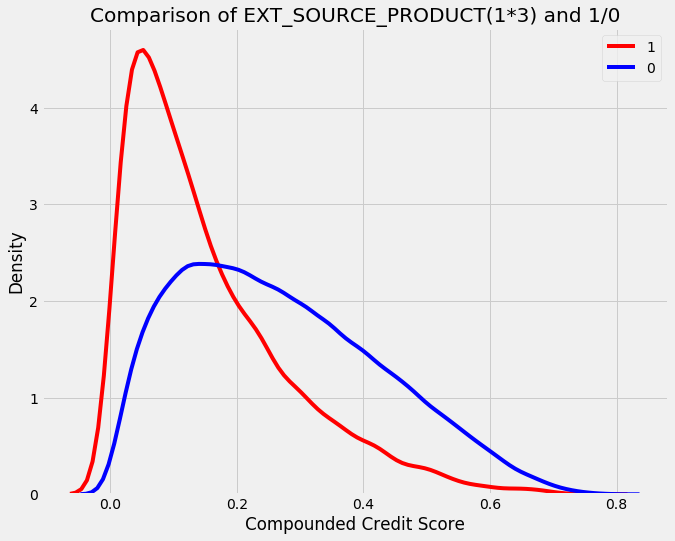

In [144]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_PRODUCT'] = app_train2.EXT_SOURCE_1 *  app_train2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT(1*3) and 1/0');


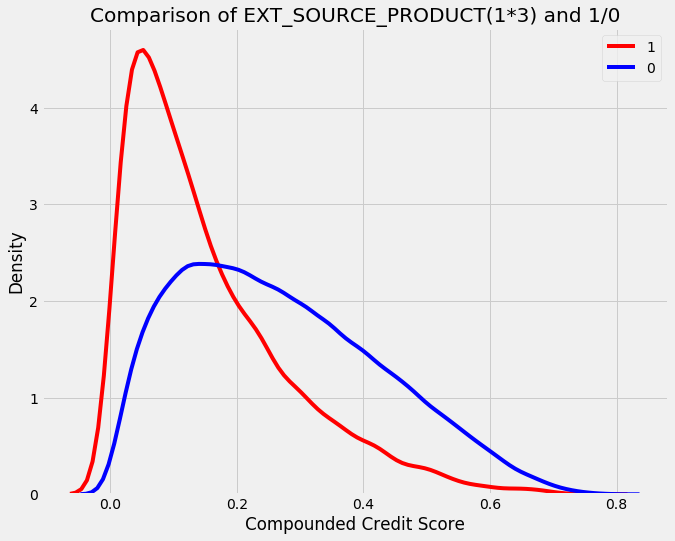

In [146]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_PRODUCT'] = app_train2.EXT_SOURCE_1 *  app_train2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_PRODUCT'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_PRODUCT'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_PRODUCT'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Comparison of EXT_SOURCE_PRODUCT(1*3) and 1/0');


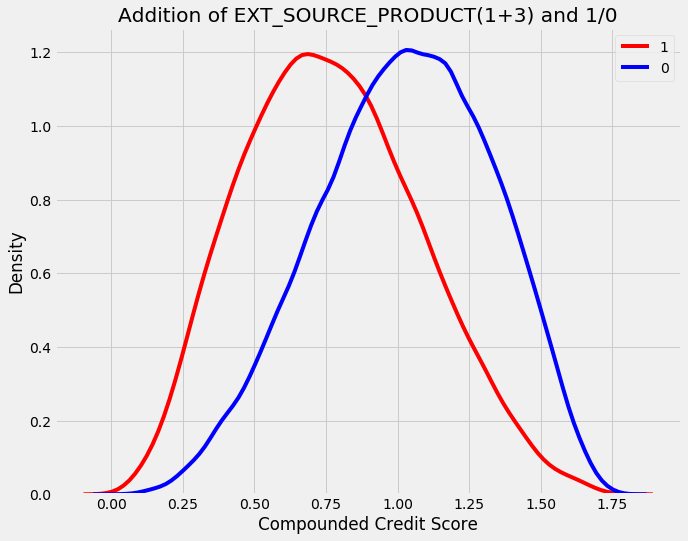

In [164]:
plt.figure(figsize = (10, 8))
# combining credit scores

app_train2['EXT_SOURCE_1_3_ADD'] = app_train2.EXT_SOURCE_1 +  app_train2.EXT_SOURCE_3
ext_product = app_train2[app_train2.EXT_SOURCE_1_3_PRODUCT.notnull()]



product = app_train2['EXT_SOURCE_1_3_ADD'].notnull()


sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 1), 'EXT_SOURCE_1_3_ADD'], label = "1", color='r') 
sns.kdeplot(ext_product.loc[(ext_product['TARGET'] == 0), 'EXT_SOURCE_1_3_ADD'], label = "0", color='b') 


# Labeling of plot
plt.xlabel('Compounded Credit Score'); plt.ylabel('Density'); plt.title('Addition of EXT_SOURCE_1_3_ADD and 1/0');


In [193]:
app_train2[app_train2['EXT_SOURCE_1_3_ADD'] < 1.00 ].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,EXT_SOURCE_2_3_PRODUCT,EXT_SOURCE_1_2_3_PRODUCT,EXT_SOURCE_1_3_PRODUCT,EXT_SOURCE_1_3_ADD
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,1,0,1,0,False,0.036649,0.003043,0.222413,0.222413
10,100014,0,0,0,1,1,112500.0,652500.0,21177.0,652500.0,...,0,0,0,0,0,False,0.237242,0.075861,0.683705,0.683705
12,100016,0,0,0,1,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,1,0,False,0.126314,0.058715,0.641484,0.641484
15,100019,0,0,1,1,0,157500.0,299772.0,20160.0,247500.0,...,0,0,0,0,0,False,0.235215,0.027199,0.794202,0.794202
21,100025,0,0,1,1,1,202500.0,1132573.5,37561.5,927000.0,...,0,0,0,0,0,False,0.126806,0.055504,0.980154,0.980154


In [192]:
app_train2[app_train2['EXT_SOURCE_1_3_ADD'] >= 1.00 ].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,EXT_SOURCE_2_3_PRODUCT,EXT_SOURCE_1_2_3_PRODUCT,EXT_SOURCE_1_3_PRODUCT,EXT_SOURCE_1_3_ADD
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,False,0.356251,0.276010,1.266822,1.266822
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,True,0.154665,0.090840,1.339058,1.339058
11,100015,0,0,0,1,0,38419.155,148365.0,10678.5,135000.0,...,0,0,0,0,0,True,0.362477,0.261725,1.374941,1.374941
25,100030,0,0,0,1,0,90000.000,225000.0,11074.5,225000.0,...,0,1,0,1,0,False,0.300612,0.168929,1.023431,1.023431
28,100033,0,0,1,1,0,270000.000,790830.0,57676.5,675000.0,...,0,0,0,0,0,False,0.359286,0.215714,1.124892,1.124892


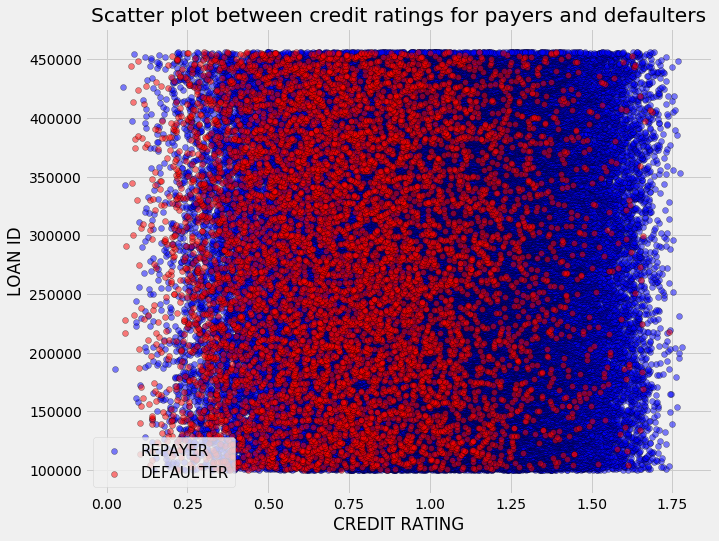

In [186]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_3_ADD'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_3_ADD'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (add) for payers and defaulters")
plt.show()

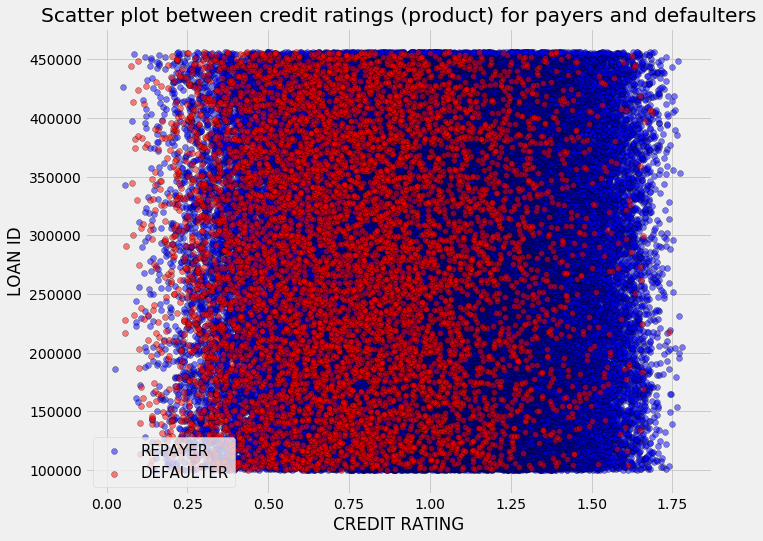

In [191]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (product) for payers and defaulters")
plt.show()

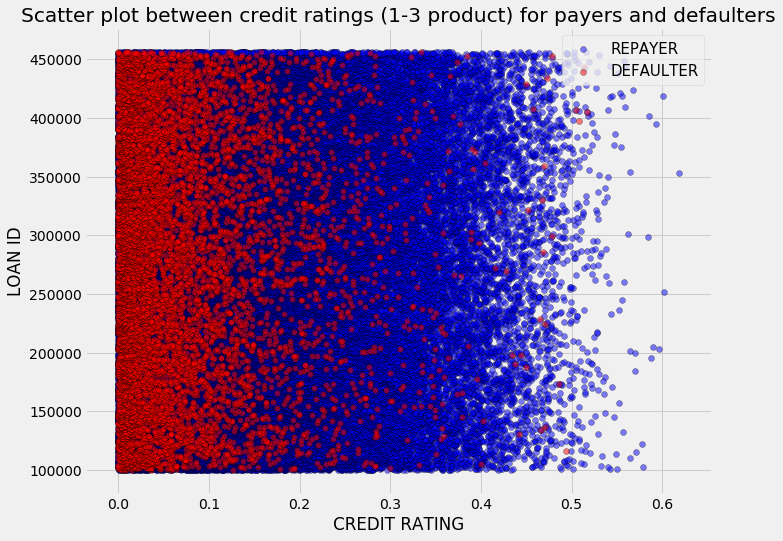

In [200]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ext_product[ext_product["TARGET"]==0]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==0]['SK_ID_CURR'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(ext_product[ext_product["TARGET"]==1]['EXT_SOURCE_1_2_3_PRODUCT'],ext_product[ext_product["TARGET"]==1]['SK_ID_CURR'],s=35,
            color="r",alpha=.5,label="DEFAULTER",linewidth=.5,edgecolor="k")

plt.legend(loc="best",prop={"size":15})
plt.xlabel("CREDIT RATING")
plt.ylabel("LOAN ID")
plt.title("Scatter plot between credit ratings (1-3 product) for payers and defaulters")

plt.show()